In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# IFarmProject
Question: What crops and countries cause the most pollution? What is driving these countries to have a high nitrogen surplus? What can be done to decrease the nitrogen usage?




In [2]:
# iFarmData
scipy.io.loadmat('data/iFarmData')
data = scipy.io.loadmat('data/iFarmData')
#print(data)

In [3]:
sorted(data.keys())
#data['FAOSTAT_CoName_FAO']

['AreaH_FAO',
 'Co_ID_group_X',
 'FAOSTAT_CoCODE_FAO',
 'FAOSTAT_CoName_FAO',
 'FAOSTAT_CrCODE_FAO',
 'FAOSTAT_CrName_FAO',
 'GDPPCAP_WB',
 'NC_Bou',
 'NUE_3d',
 'Ndep_kgkm',
 'Nexc_kgkm',
 'Nfer_kgkm',
 'NfixR_kgkm_HDF',
 'Nfix_kgkm',
 'Nman_kgkm',
 'Nyield_kgkm',
 'Popu_FAO',
 'Popu_rural_FAO',
 'Pr_Crop_US',
 'Yield_FAO',
 'Yr',
 '__globals__',
 '__header__',
 '__version__',
 'cr_group_com',
 'netImTrade',
 'netImTradeVal']

# Finding the Most Nitrogen Polluting Country

In [4]:
N_sur = data['Nexc_kgkm']

yr2015 = int(np.where(data['Yr'][0] == 2015)[0])
yr1961 = int(np.where(data['Yr'][0] == 1961)[0])


mexico = int(np.where(data['FAOSTAT_CoName_FAO'] == 'Mexico')[0])
US = int(np.where(data['FAOSTAT_CoName_FAO'] == 'United States of America')[0])
china = int(np.where(data['FAOSTAT_CoName_FAO'] == 'China')[0])
PRico = int(np.where(data['FAOSTAT_CoName_FAO'] == 'Puerto Rico')[0])


In [46]:
for i in range(170):
    if np.isfinite(N_sur[mexico][i][yr2015]):
        #print(N_sur[mexico][i][yr2015])
        
        

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_9424/2439870006.py, line 5)

# Nitrogen Content in each crop (shown by crop code)

<Figure size 360x360 with 0 Axes>

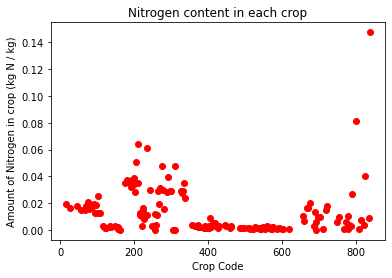

<Figure size 360x360 with 0 Axes>

In [6]:
#NC_Bou --> cr
#FAOSTAT_CrCODE_FAO --> cr

NC = data['NC_Bou']
NC = NC.reshape(170,1)
#print((NC.shape))
#print(type(NC))

cr = data['FAOSTAT_CrCODE_FAO']
#print(len(cr))


# The amount on Nitrogen in each crop
plt.scatter(cr,NC, color = 'Red')
plt.title('Nitrogen content in each crop')
plt.xlabel('Crop Code')
plt.ylabel('Amount of Nitrogen in crop (kg N / kg)')
plt.figure(figsize=(5,5))

Plot shows the amount of Nitrogen contained in each crop

# Most polluting crops by crop id

In [7]:
# Top 10 most polluting crops

m = NC[NC > 0.038]
#print(m)

cr_nc = pd.DataFrame(np.hstack((NC,cr)), columns = ['Nitrogen Content', 'Crop Id'])
#cr_nc

cr_nc[cr_nc['Nitrogen Content'] > 0.038]

,Nitrogen Content,Crop Id
0,0.08100,800.0
63,0.14750,839.0
72,0.04800,311.0
79,0.03872,201.0
82,0.06400,210.0
92,0.03984,292.0
142,0.06080,236.0
157,0.04000,826.0
160,0.04800,275.0
163,0.05040,205.0


Top 10 crops(by Crop ID) that pollute the most nitrogen 

# Matching crop id to crop name

In [8]:
# Names of the top 10 most polluting crops
cr_code = data['FAOSTAT_CrCODE_FAO']
cr_name = data['FAOSTAT_CrName_FAO']

nameAndId = pd.DataFrame(np.hstack((cr_name,cr_code)), columns = ['Crop Name', 'Crop Id'])

nameAndId[(nameAndId['Crop Id'] == 800) | (nameAndId['Crop Id'] == 839) | (nameAndId['Crop Id'] == 311) | (nameAndId['Crop Id'] == 201)
         | (nameAndId['Crop Id'] == 210) | (nameAndId['Crop Id'] == 292) | (nameAndId['Crop Id'] == 236) | (nameAndId['Crop Id'] == 826)
         | (nameAndId['Crop Id'] == 275) | (nameAndId['Crop Id'] == 205)]

,Crop Name,Crop Id
0,[Agave Fibres Nes],800
63,[Gums Natural],839
72,[Kapokseed in Shell],311
79,[Lentils],201
82,[Lupins],210
92,[Mustard seed],292
142,[Soybeans],236
157,[Tobacco; unmanufactured],826
160,[Tung Nuts],275
163,[Vetches],205


Listed above is the top 10 most polluting crops 

# Top 10 most polluting crops
Agave Fibres Nes (800) ---> 0.081 \
Gums Natural (839) ---> 0.14750 \
Kapokseed in Shell (311) ---> 0.048 \
Lentils (201) ---> 0.03872 \
Lupins (210) ---> 0.064 \
Mustard seed (292) ---> 0.03984 \
Soybeans (236) ---> 0.0608 \
Tobacco; unmanufactured (826) ---> 0.04 \
Tung Nuts (275) ---> 0.048 \
Vetches (205) ---> 0.0504

# Tracing back crops to the country they are grown

In [9]:
c_code = data['FAOSTAT_CoCODE_FAO']
c_name = data['FAOSTAT_CoName_FAO']

countryAndId = pd.DataFrame(np.hstack((c_name,c_code)), columns = ['Country Name', 'Country Id'])
#countryAndId
c_name[57]

array([array(['Ecuador'], dtype='<U7')], dtype=object)

In [10]:
# use Nyield_kgkm possibly

# country,crop,year
N_content = data['Nyield_kgkm']
N_sur = data['Nexc_kgkm'] #kg N / km^2

# Gathering each crops index
agave = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Agave Fibres Nes')[0])
gums = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Gums Natural')[0])
kapo = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Kapokseed in Shell')[0])
lentils = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Lentils')[0])
lupins = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Lupins')[0])
mustard = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Mustard seed')[0])
soybean = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Soybeans')[0])
tobacco = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Tobacco; unmanufactured')[0])
tung = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Tung Nuts')[0])
vetches = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Vetches')[0])

# A given year(first year vs. last year)
yr1961 = int(np.where(data['Yr'][0] == 1961)[0])
yr2015 = int(np.where(data['Yr'][0] == 2015)[0])

#Lenght of country name is 218
a = 218
#Length of crop name is 170
b = 170

In [11]:
# Used to find the index of the country that produces the crops we want to look at
# !!! Hopefully we find an easier way to do this !!!

#for i in range(218):
    #if np.isfinite(N_content[i][agave][yr1961]):
        #print(f'Index of country ---> {i}')
        #print(f'Amount of Nitrogen in Crop yield for given crop ---> {N_content[i][vetches][yr2015]}')

# Plotting Nitrogen Content for each crop (1961 vs 2015)

In [12]:
country = data['FAOSTAT_CoName_FAO']
len(country)

218

In [45]:
for i in range(218):
    if np.isfinite(N_sur[i][kapo][yr2015]):
        print(N_sur[i][kapo][yr2015])

## Fibres Agave Nes

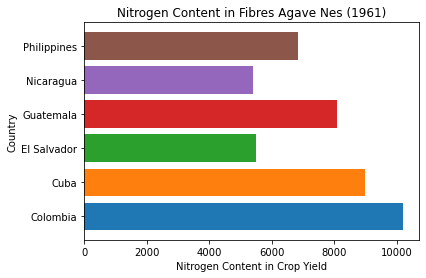

In [13]:
for i in range(218):
    if np.isfinite(N_content[i][agave][yr1961]):
        #print(N_content[i][agave][yr1961])
        x = country[i][0][0]
        y = N_content[i][agave][yr1961]
        
       # x_tick = range(len(x))
        plt.title('Nitrogen Content in Fibres Agave Nes (1961)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        #plt.xticks(x)
        
        plt.rcParams['figure.figsize'] = [5, 10]
        
        
        plt.barh(x,y)
       

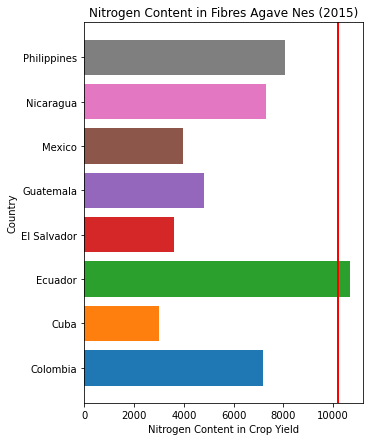

In [48]:
for i in range(218):
    if np.isfinite(N_content[i][agave][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
        x = country[i][0][0]
        y = N_content[i][agave][yr2015]
        
        plt.title('Nitrogen Content in Fibres Agave Nes (2015)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        plt.axvline(x = 10200.33, color = 'red')
        
        plt.rcParams['figure.figsize'] = [5, 10]
            
        plt.barh(x, y)

## Lentils

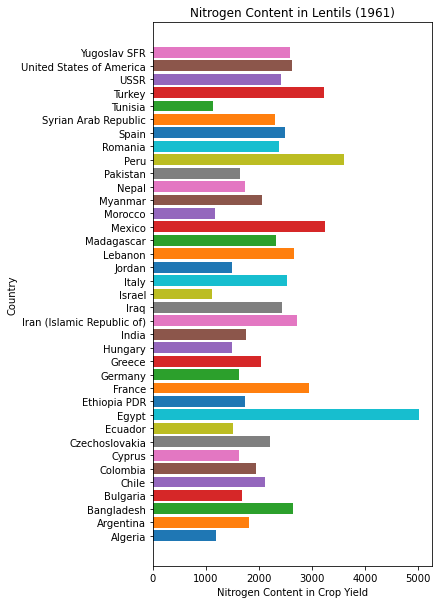

In [49]:
for i in range(218):
    if np.isfinite(N_content[i][lentils][yr1961]):
        #print(N_content[i][lentils][yr1961])
        x = country[i][0][0]
        y = N_content[i][lentils][yr1961]
        
        plt.title('Nitrogen Content in Lentils (1961)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [5, 10]
            
        plt.barh(x, y)

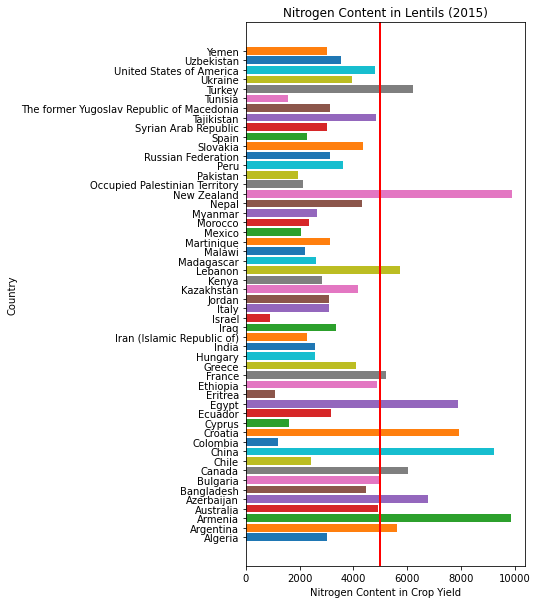

In [50]:
for i in range(218):
    if np.isfinite(N_content[i][lentils][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
        x = country[i][0][0]
        y = N_content[i][lentils][yr2015]
        
        plt.title('Nitrogen Content in Lentils (2015)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        plt.axvline(x = 5005.72, color = 'red')
        
        plt.rcParams['figure.figsize'] = [7, 20]
        
        plt.barh(x, y)

## Lupins

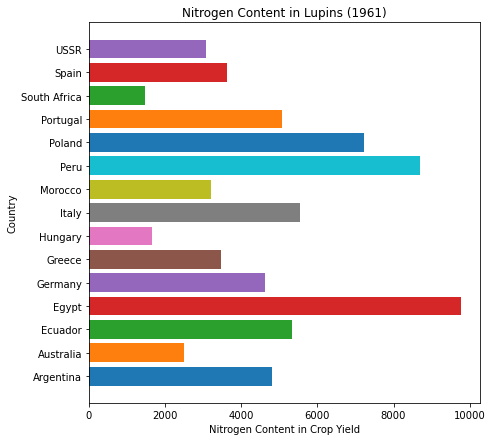

In [63]:
for i in range(218):
    if np.isfinite(N_content[i][lupins][yr1961]):
        #print(N_content[i][lupins][yr1961])
        x = country[i][0][0]
        y = N_content[i][lupins][yr1961]
        
        plt.title('Nitrogen Content in Lupins (1961)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [5, 7]
        
        plt.barh(x, y)

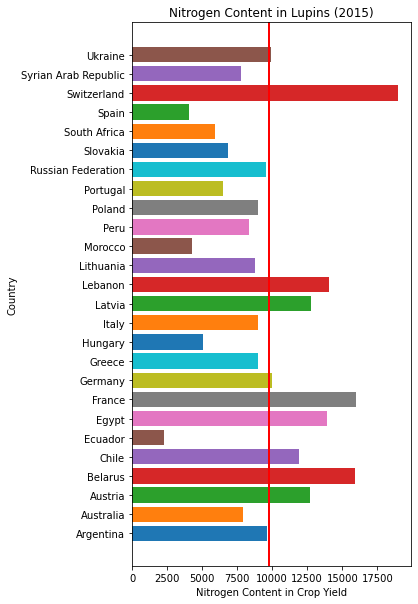

In [66]:
for i in range(218):
    if np.isfinite(N_content[i][lupins][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
        x = country[i][0][0]
        y = N_content[i][lupins][yr2015]
        
        plt.title('Nitrogen Content in Lupins (2015)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        plt.axvline(x = 9769.6, color = 'red')
        
        plt.rcParams['figure.figsize'] = [5, 10]
        
        plt.barh(x, y)

## Mustard seed

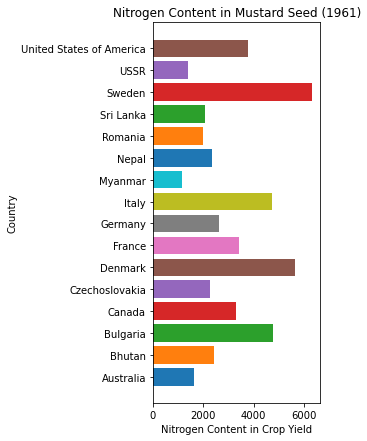

In [69]:
for i in range(218):
    if np.isfinite(N_content[i][mustard][yr1961]):
        #print(N_content[i][mustard][yr1961])
        x = country[i][0][0]
        y = N_content[i][mustard][yr1961]
        
        plt.title('Nitrogen Content in Mustard Seed (1961)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [3, 10]
        
        plt.barh(x, y)

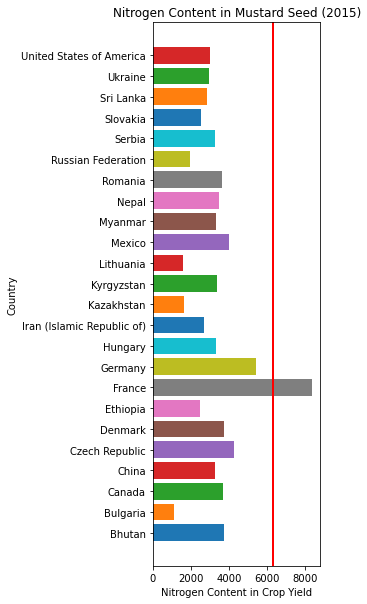

In [70]:
for i in range(218):
    if np.isfinite(N_content[i][mustard][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
        x = country[i][0][0]
        y = N_content[i][mustard][yr2015]
        
        plt.title('Nitrogen Content in Mustard Seed (2015)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        plt.axvline(x = 6336.552, color = 'red')
        
        plt.rcParams['figure.figsize'] = [3, 10]
        
        plt.barh(x, y)

## Soybeans

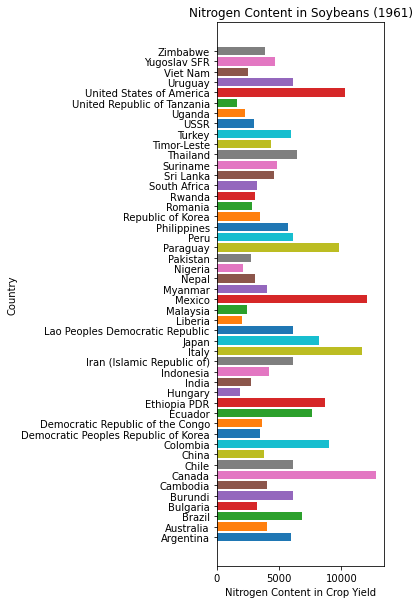

In [71]:
for i in range(218):
    if np.isfinite(N_content[i][soybean][yr1961]):
        #print(N_content[i][soybean][yr1961])
        x = country[i][0][0]
        y = N_content[i][soybean][yr1961]
        
        plt.title('Nitrogen Content in Soybeans (1961)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [11, 10]
        
        plt.barh(x, y)

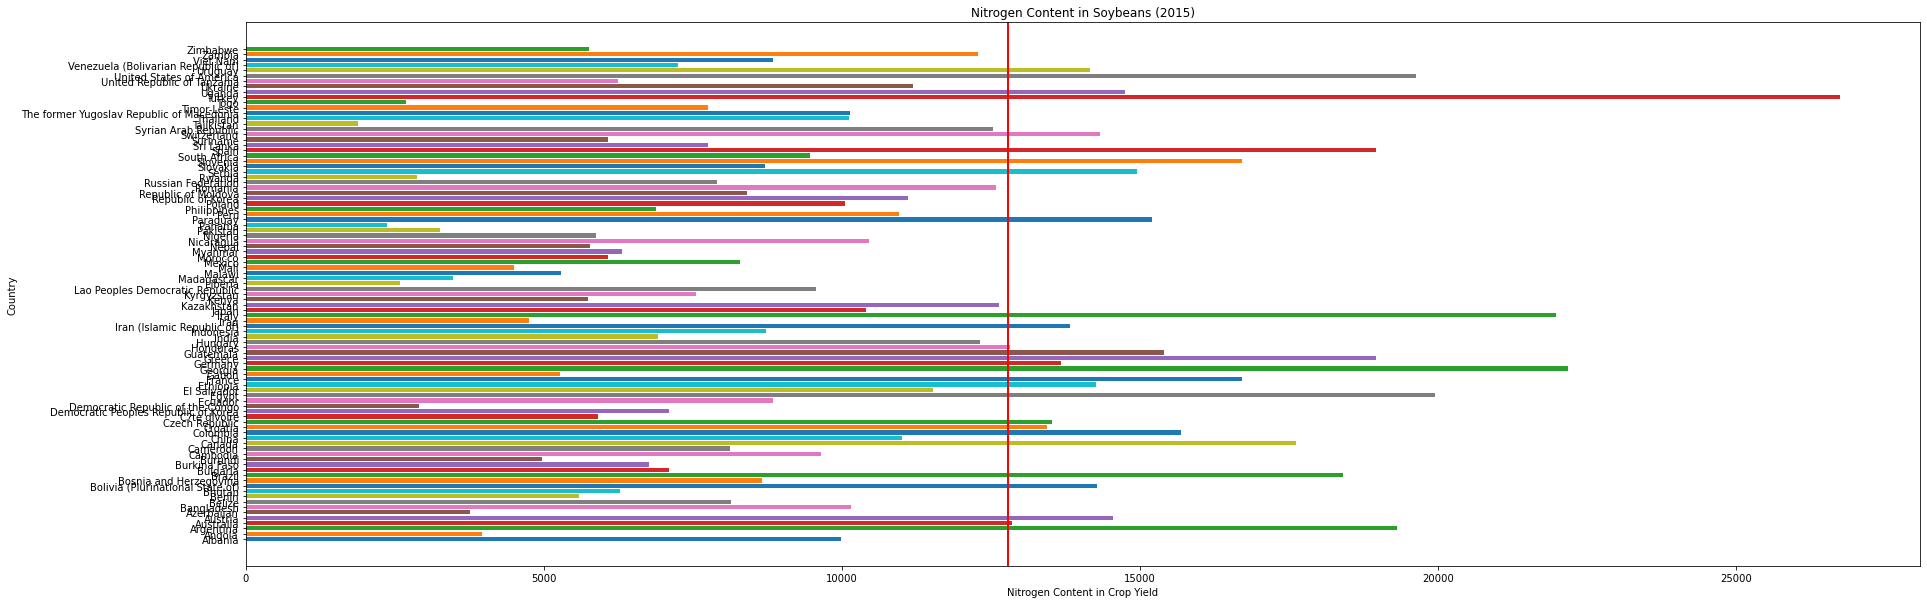

In [75]:
for i in range(218):
    if np.isfinite(N_content[i][soybean][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
        x = country[i][0][0]
        y = N_content[i][soybean][yr2015]
        
        plt.title('Nitrogen Content in Soybeans (2015)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        plt.axvline(x = 12788.064, color = 'red')
        
        plt.rcParams['figure.figsize'] = [40, 10]
        
        plt.barh(x, y)

## Tobacco

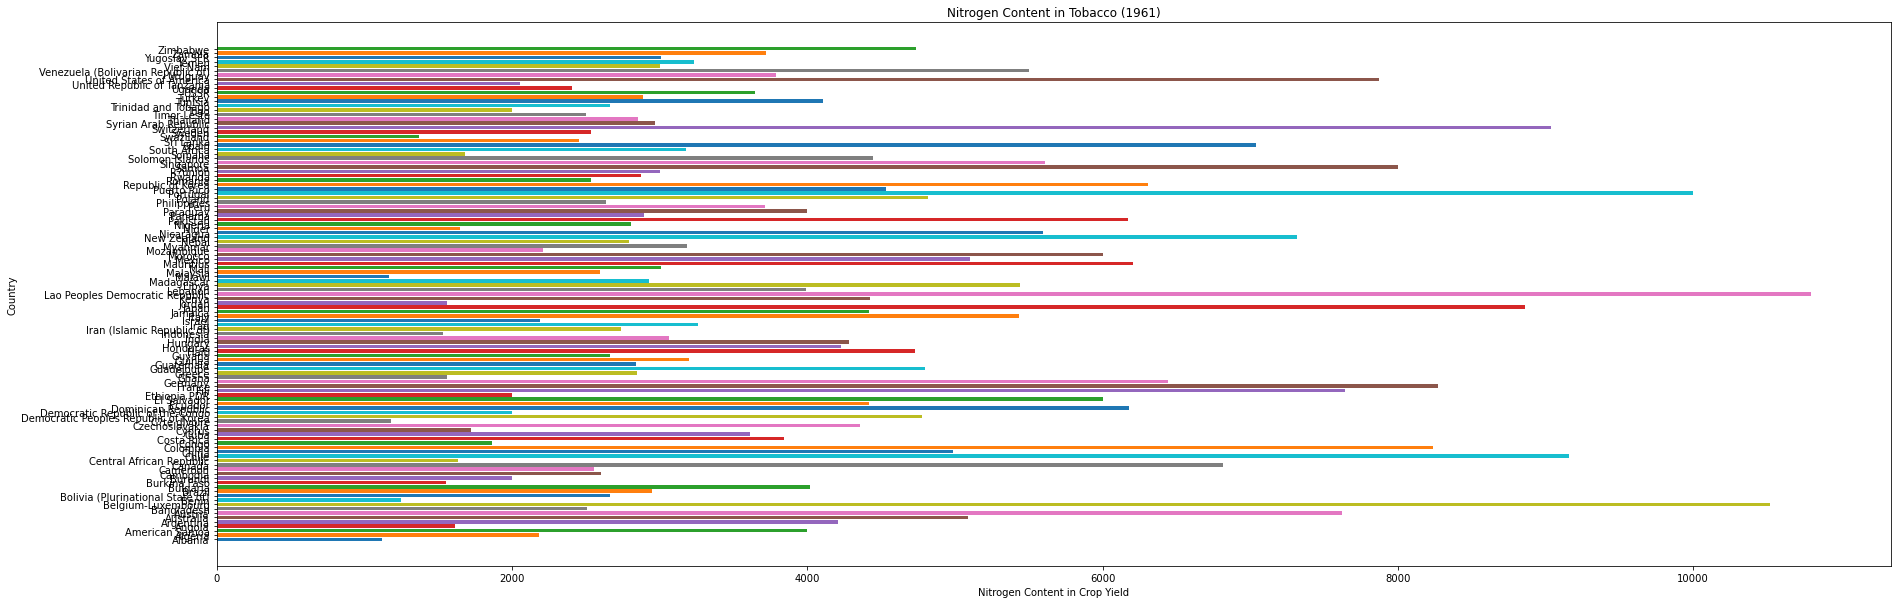

In [57]:
for i in range(218):
    if np.isfinite(N_content[i][tobacco][yr1961]):
        #print(N_content[i][tobacco][yr1961])
        x = country[i][0][0]
        y = N_content[i][tobacco][yr1961]
        
        plt.title('Nitrogen Content in Tobacco (1961)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [50, 20]
        
        plt.barh(x, y)

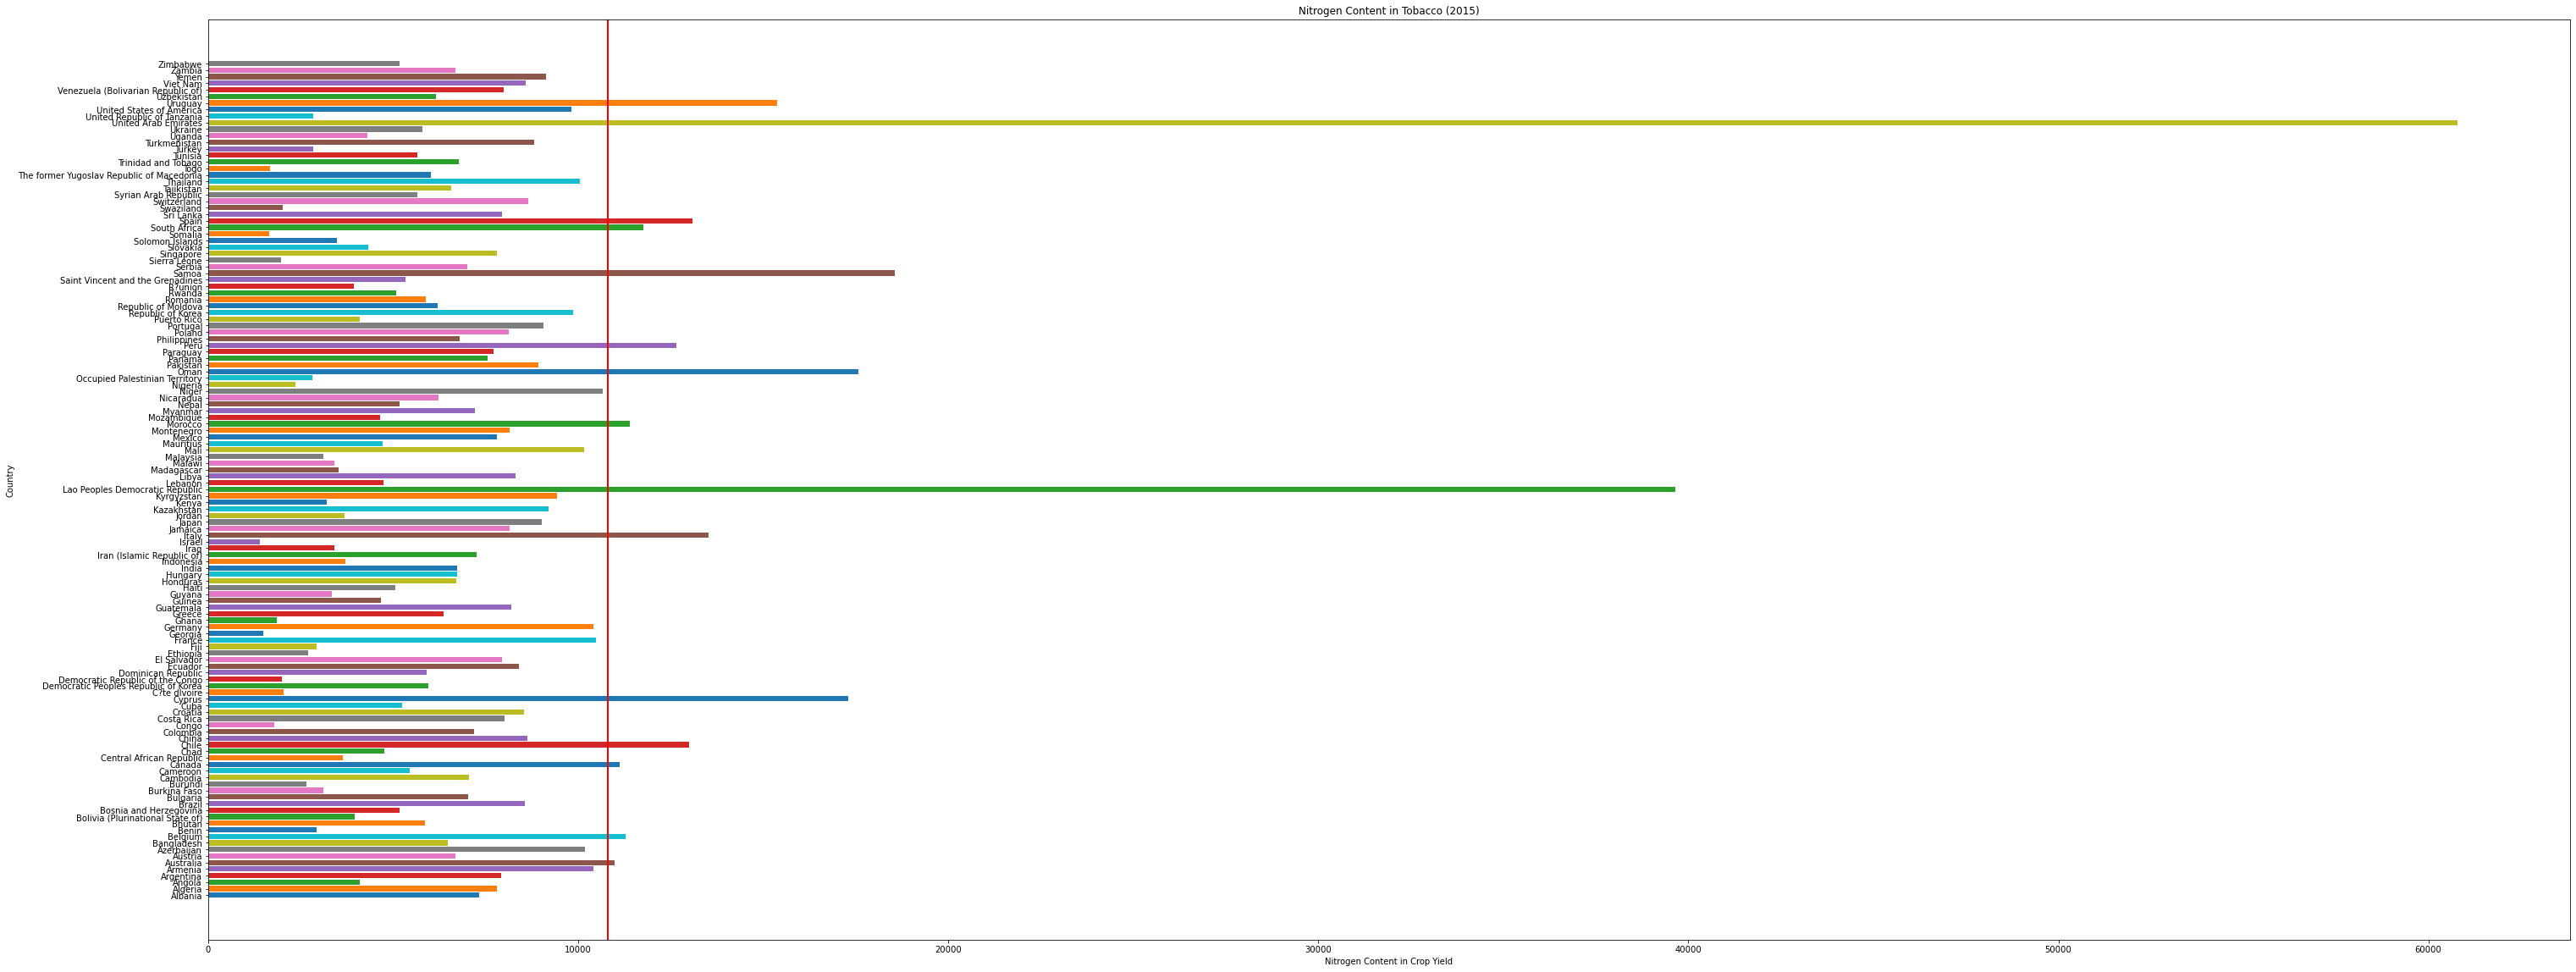

In [58]:
for i in range(218):
    if np.isfinite(N_content[i][tobacco][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
        x = country[i][0][0]
        y = N_content[i][tobacco][yr2015]
        
        plt.title('Nitrogen Content in Tobacco (2015)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        plt.axvline(x = 10800.0, color = 'red')
        
        plt.rcParams['figure.figsize'] = [7, 20]
        
        plt.barh(x, y)

## Tung Nuts

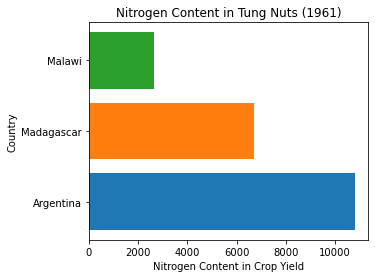

In [112]:
for i in range(218):
    if np.isfinite(N_content[i][tung][yr1961]):
        #print(N_content[i][tung][yr1961])
        x = country[i][0][0]
        y = N_content[i][tung][yr1961]
        
        plt.title('Nitrogen Content in Tung Nuts (1961)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [5, 7]
        
        plt.barh(x, y)

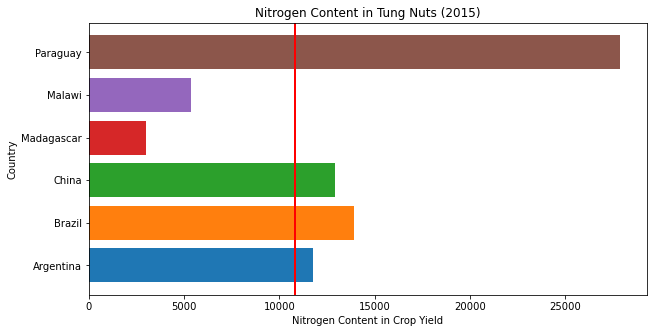

In [84]:
for i in range(218):
    if np.isfinite(N_content[i][tung][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
        x = country[i][0][0]
        y = N_content[i][tung][yr2015]
        
        plt.title('Nitrogen Content in Tung Nuts (2015)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        plt.axvline(x = 10800.0, color = 'red')
        
        plt.rcParams['figure.figsize'] = [10, 10]
        
        plt.barh(x, y)

## Vetches

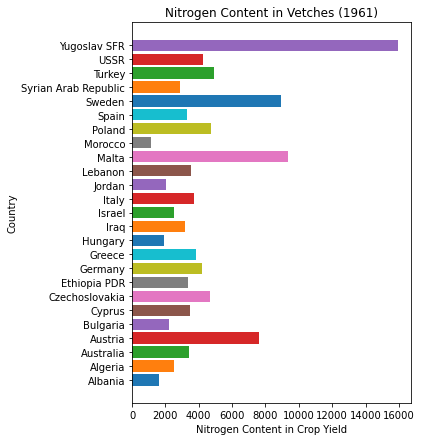

In [113]:
for i in range(218):
    if np.isfinite(N_content[i][vetches][yr1961]):
        #print(N_content[i][vetches][yr1961])
        x = country[i][0][0]
        y = N_content[i][vetches][yr1961]
        
        plt.title('Nitrogen Content in Vetches (1961)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [7, 7]
        
        plt.barh(x, y)

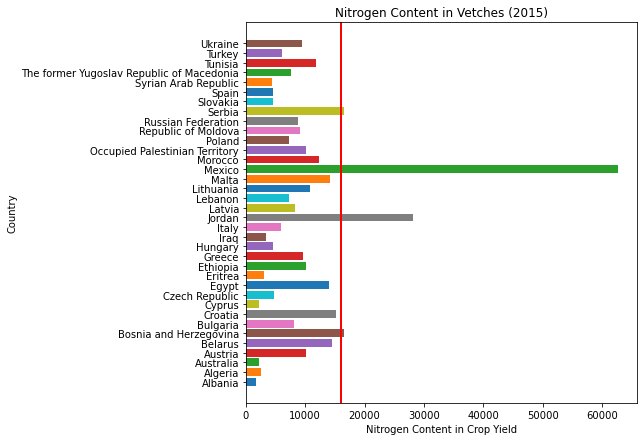

In [115]:
for i in range(218):
    if np.isfinite(N_content[i][vetches][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
        x = country[i][0][0]
        y = N_content[i][vetches][yr2015]
        
        plt.title('Nitrogen Content in Vetches (2015)')
        plt.xlabel('Nitrogen Content in Crop Yield')
        plt.ylabel('Country')
        plt.axvline(x = 15934.464, color = 'red')
        
        plt.rcParams['figure.figsize'] = [8, 7]
        
        plt.barh(x, y)

# Mexico Crop Data

In [29]:
# Collecting Country index for Mexico
mexico = int(np.where(data['FAOSTAT_CoName_FAO'] == 'Mexico')[0])
mexico

122

## Plot of crops in Mexico from top 10

<BarContainer object of 6 artists>

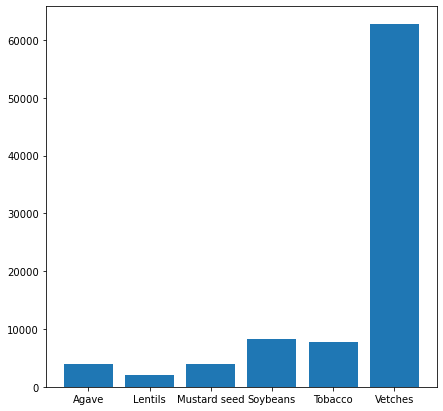

In [30]:
# Finding Idx of top 10 crops 
x = ['Agave', 'Lentils', 'Mustard seed', 'Soybeans', 'Tobacco', 'Vetches']
y = [N_content[mexico][agave][yr2015], N_content[mexico][lentils][yr2015], N_content[mexico][mustard][yr2015], 
    N_content[mexico][soybean][yr2015], N_content[mexico][tobacco][yr2015], N_content[mexico][vetches][yr2015]]
plt.bar(x,y)

## Crop yield 

In [31]:
# Crop Yield 
agave_yld = data['Yield_FAO'][mexico][agave][yr2015]
lentils_yld = data['Yield_FAO'][mexico][lentils][yr2015]
mustard_yld = data['Yield_FAO'][mexico][mustard][yr2015]
soybean_yld = data['Yield_FAO'][mexico][soybean][yr2015]
tobacco_yld = data['Yield_FAO'][mexico][tobacco][yr2015]
vetches_yld = data['Yield_FAO'][mexico][vetches][yr2015]

print('Mexico produced:')
print('================')
print(f'Fibres Agave Nes : {agave_yld}(kg/km^2)')
print(f'Lentils : {lentils_yld}(kg/km^2)')
print(f'Mustard Seed : {mustard_yld}(kg/km^2)')
print(f'Soybeans : {soybean_yld}(kg/km^2)')
print(f'Tobacco : {tobacco_yld}(kg/km^2)')
print(f'Vetches : {vetches_yld}(kg/km^2)')

Mexico produced:
Fibres Agave Nes : 49100.0(kg/km^2)
Lentils : 52660.0(kg/km^2)
Mustard Seed : 100000.0(kg/km^2)
Soybeans : 136450.0(kg/km^2)
Tobacco : 194850.0(kg/km^2)
Vetches : 1243860.0(kg/km^2)


## Plot of all crops in Mexico

In [32]:
cr_name = data['FAOSTAT_CrName_FAO']


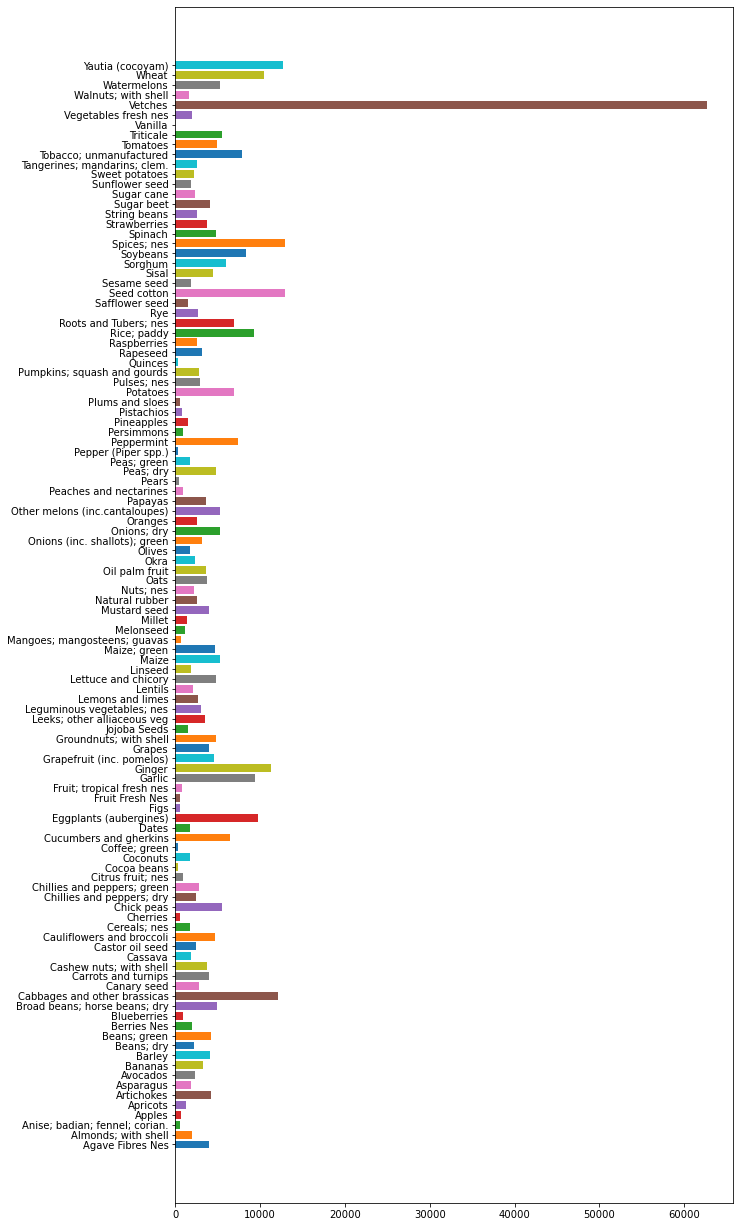

In [33]:
# Each crop and 
for i in range(170):
    if np.isfinite(N_content[mexico][i][yr2015]):
        x = cr_name[i][0][0]
        a = data['FAOSTAT_CrName_FAO'][i][0][0]
        b = N_content[mexico][i][yr2015]
        #print(f'{a} produces this much Nitrogen ---> {b}')
        
        plt.rcParams['figure.figsize'] = [10, 22]
        
        plt.barh(x,b)
        
    

## Fertilization

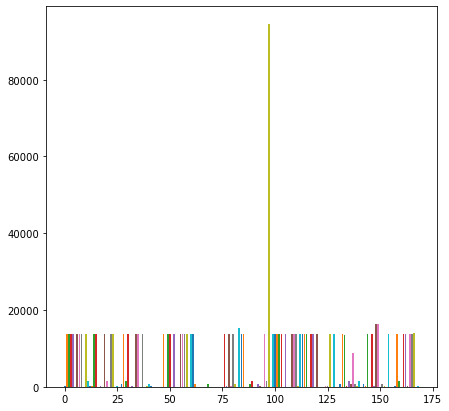

In [34]:
fert = data['Nfer_kgkm'] # (co,cr,yr)
for i in range(170):
    if np.isfinite(fert[mexico][i][yr2015]):
        x = i
        a = data['FAOSTAT_CrName_FAO'][i][0][0]
        y = fert[mexico][i][yr2015]
        #print(f'{i} {a} is fertilized ---> {y} kg N / km^2')
        
        plt.rcParams['figure.figsize'] = [7, 7]
       
        plt.bar(x,y)

## Imports/Exports